In [4]:
import io
import pandas as pd
df_results = pd.read_csv('https://randomfilesbucket01903933.s3.eu-north-1.amazonaws.com/csv-files/MP2_Data.csv')
nrow, ncol = df_results.shape
print(f'There are {nrow} rows and {ncol} columns.')
df_results.head(2)

There are 107 rows and 48 columns.


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.0,21.88,5.0,5.0,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.0,22.27,5.0,4.0,5.0,...,8,5,2,0,0,25,3,2,5,4


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Step 1 - Data Preprocessing


In [ ]:
print(df_results.sum())

ID             ML-2020-1ML-2020-2ML-2020-3ML-2020-4ML-2020-6M...
Week2_Quiz1                                               257.51
Week3_MP1                                                 850.61
Week3_PR1                                                  300.0
Week5_MP2                                                 988.44
Week5_PR2                                                 304.38
Week7_MP3                                                1549.56
Week7_PR3                                                  255.0
Week4_Quiz2                                               279.21
Week6_Quiz3                                                285.0
Week8_Total                                              5069.71
Week1_Stat0                                                  726
Week1_Stat1                                                    0
Week1_Stat2                                                   64
Week1_Stat3                                                   24
Week2_Stat0              

In [ ]:
# Drop columns that that won’t be necessary in the analysis
df_results = df_results.drop(columns=['ID', 'Week1_Stat1'])
df_results.head(2)

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.0,21.88,5.0,5.0,5.0,82.97,...,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.0,22.27,5.0,4.0,5.0,82.43,...,8,5,2,0,0,25,3,2,5,4


In [ ]:
df_results.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,...,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,...,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,...,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,...,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,...,12.000000,90.000000,27.000000,22.000000,9.000000,62.000000,12.000000,25.000000,5.000000,5.000000


EDA

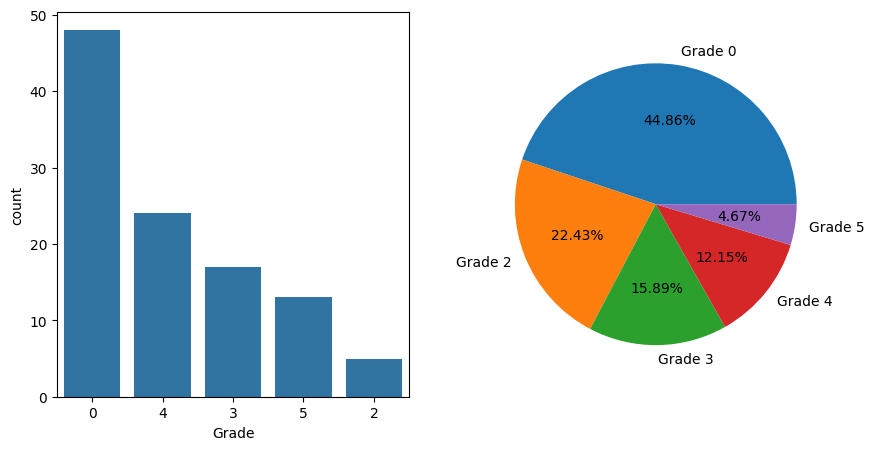

In [ ]:
fig1, ax = plt.subplots(1,2, figsize=(10,5))

# pie chart
ax[1]=plt.pie(df_results['Grade'].value_counts(),
            autopct='%1.2f%%', labels=['Grade 0', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])

# count plot
sns.countplot(x='Grade', data=df_results, order=df_results['Grade'].value_counts().index, ax=ax[0])
plt.show()

<Axes: >

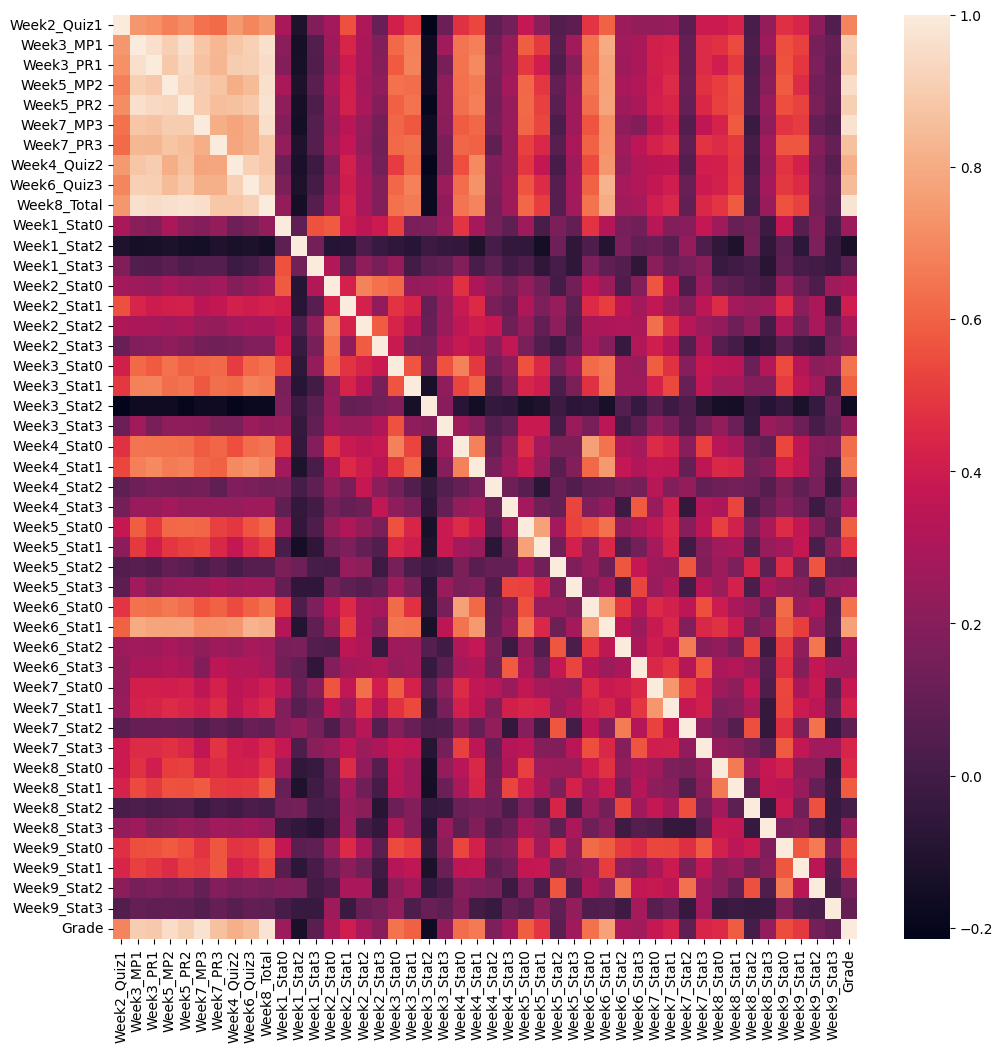

In [ ]:
#Finding the correlation between all features and our target 'Grade'
plt.figure(figsize=(12,12))
sns.heatmap(df_results.corr(numeric_only=True), annot=False)

<Axes: >

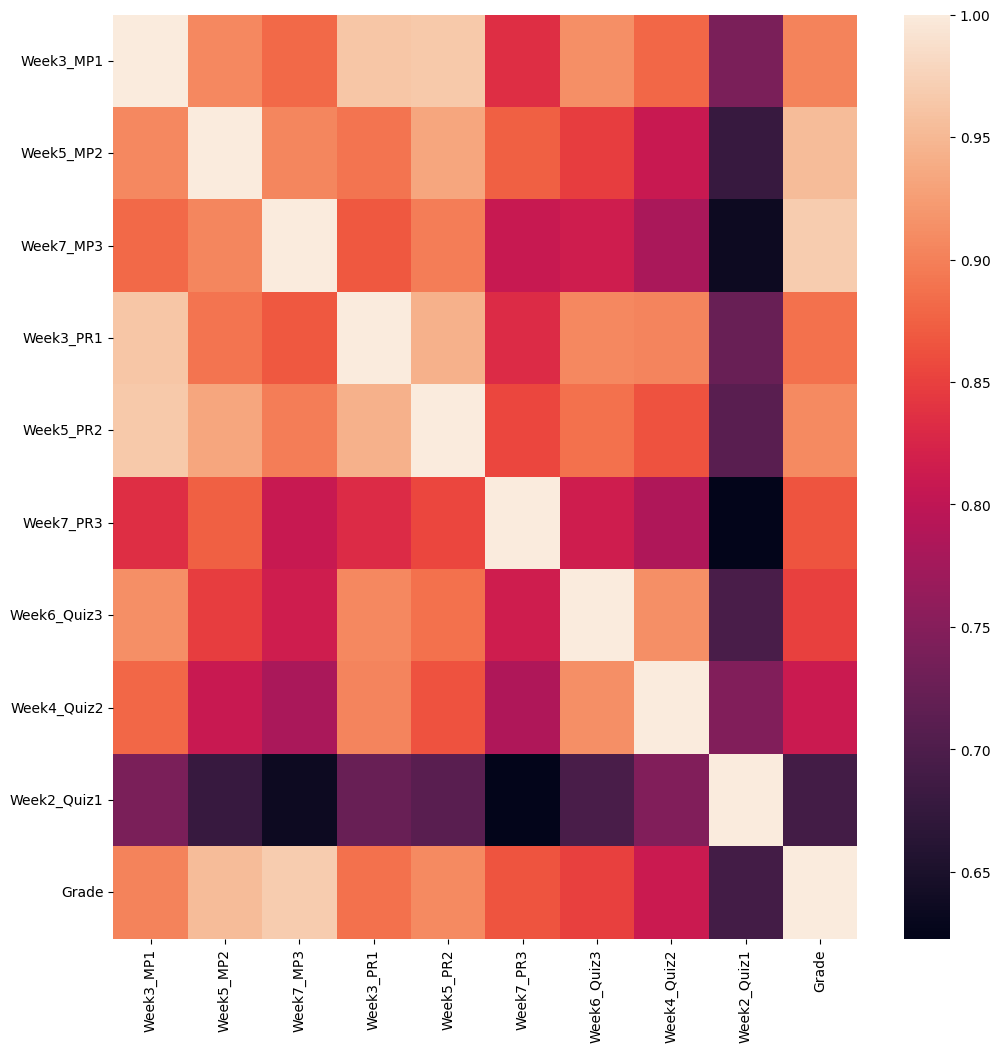

In [ ]:
# After close examination, these are the features selected. The others have really low correlation and doesn’t seem likely to affect students grade.
selected_features = ['Week3_MP1','Week5_MP2', 'Week7_MP3','Week3_PR1','Week5_PR2','Week7_PR3', 'Week6_Quiz3', 'Week4_Quiz2','Week2_Quiz1']

# Let's run a correlation between the selected features and the grade
plt.figure(figsize=(12,12))
sns.heatmap(df_results[selected_features + ['Grade']].corr(numeric_only=True), annot=False)

## Step 2 - Data split: Training and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Dividing the dataset into selected features and targets
X = df_results[selected_features]
Y = df_results['Grade']

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

def train_models(type, X_train, X_test, y_train):
  """
  Trains and evaluates several classification models.

  Args:
    type: The algorithm type being used.
    X_train: The training dataset features.
    X_test: The testing dataset features.
    y_train: The training dataset target variable

  Returns:
    The prediction of the trained type.
  """
  type.fit(X_train, y_train)
  y_pred = type.predict(X_test)


  return y_pred

## Step 3 - Model Training

Type 1 - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# # instantiating RadndomForestClassifier() model
rfc = RandomForestClassifier(n_estimators= 3, criterion="entropy")

rfc_y_pred = train_models(rfc, X_train, X_test, y_train)

Type 2 - Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# instantiating LogisticsRegression() model
log_r = LogisticRegression()

# Train the model using Logistics Regression via the train_models helper function
log_y_pred = train_models(log_r, X_train, X_test, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 4 - Model Evaluation

In [ ]:
#Helper functions to help evaluate accuracy of the models
def evaluate_predictions(model,y_true, y_pred):
  """
  Evaluates the model's predictions and prints the results in a nice format.

  Args:
    y_true: The true target values.
    y_pred: The predicted target values.
  """
  accuracy = accuracy_score(y_true, y_pred)
  conf_matrix = confusion_matrix(y_true, y_pred)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix for {model.__class__.__name__}')
  plt.show()
  class_report = classification_report(y_true, y_pred)

  print(f"\nClassification Report for {model.__class__.__name__}:")
  print(class_report)
  print("Accuracy: {} %".format(round(accuracy*100,2)) )

Evaluation for random Forest Classifier

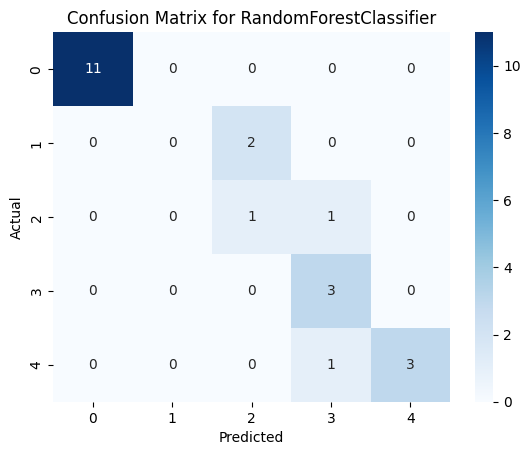


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           2       0.00      0.00      0.00         2
           3       0.33      0.50      0.40         2
           4       0.60      1.00      0.75         3
           5       1.00      0.75      0.86         4

    accuracy                           0.82        22
   macro avg       0.59      0.65      0.60        22
weighted avg       0.79      0.82      0.79        22

Accuracy: 81.82 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
evaluate_predictions(rfc, y_test, rfc_y_pred)

Evaluation for Logistics Regression

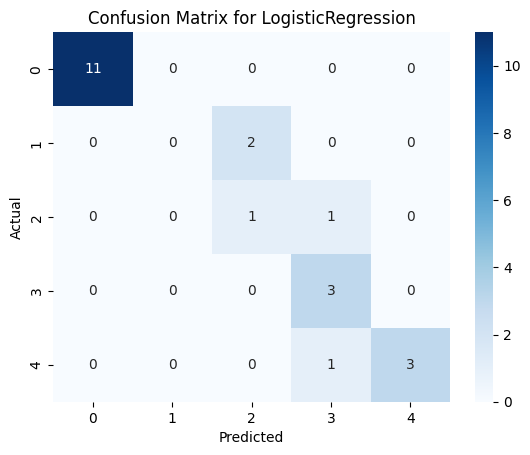


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           2       0.00      0.00      0.00         2
           3       0.33      0.50      0.40         2
           4       0.60      1.00      0.75         3
           5       1.00      0.75      0.86         4

    accuracy                           0.82        22
   macro avg       0.59      0.65      0.60        22
weighted avg       0.79      0.82      0.79        22

Accuracy: 81.82 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
evaluate_predictions(log_r,y_test, log_y_pred)

## Step 5 - Important Features

,feature,importance
2,Week7_MP3,0.515922
1,Week5_MP2,0.319447
0,Week3_MP1,0.081408
8,Week2_Quiz1,0.027824
4,Week5_PR2,0.023391
7,Week4_Quiz2,0.014722
5,Week7_PR3,0.009084
6,Week6_Quiz3,0.008201
3,Week3_PR1,0.000000


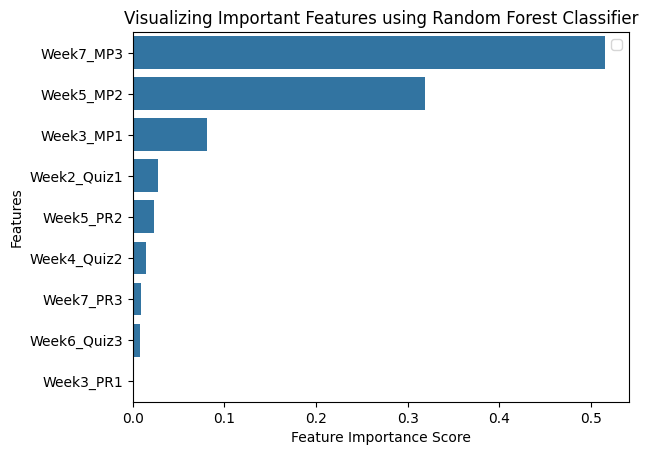

In [ ]:
# get the feature important features
feature_importances_rfc = rfc.feature_importances_.flatten()

# create a dataframe.
feature_importances_df_rfc = pd.DataFrame(
    data={
        "feature": X.columns,
        "importance": feature_importances_rfc,
    }
)

# sort the dataframe by the importance values.
feature_importances_df_rfc = feature_importances_df_rfc.sort_values(by="importance", ascending=False)

# print the dataframe
display(feature_importances_df_rfc)

#Creating a bar plot
sns.barplot(x = feature_importances_df_rfc.importance, y = feature_importances_df_rfc.feature)

#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features using Random Forest Classifier')
plt.legend()
plt.show()

From the analysis above, we can see that the most important features in predicting the final grade are;
1. Mini Project 3 in Week 7
2. Mini Project 2 in Week 5
3. Peer Review 3 in Week 7